<a href="https://colab.research.google.com/github/mohanrajvenkatacahalam/Machine-Learning/blob/master/Mutiple_linear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
insurance=pd.read_csv("insurance.csv");

https://medium.com/analytics-vidhya/predicting-medical-insurance-costs-machine-learning-e1e4e7c4e8ed

https://www.kaggle.com/mirichoi0218/insurance

In [0]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [0]:
insurance.tail()

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [0]:
insurance['sex']

0       female
1         male
2         male
3         male
4         male
         ...  
1333      male
1334    female
1335    female
1336    female
1337    female
Name: sex, Length: 1338, dtype: object

In [0]:
insurance.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [0]:
insurance['sex']=insurance['sex'].apply({'male':0 , 'female':1 }.get)

In [0]:
insurance['smoker']=insurance['smoker'].apply({'yes':1 ,'no':0}.get)

In [0]:
insurance['region']=insurance['region'].apply({'southwest':1,'southeast':2 ,'northwest':3 ,'northeast':4}.get)

In [0]:
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,1,27.900,0,1,1,16884.92400
1,18,0,33.770,1,0,2,1725.55230
2,28,0,33.000,3,0,2,4449.46200
3,33,0,22.705,0,0,3,21984.47061
4,32,0,28.880,0,0,3,3866.85520


In [0]:
insurance.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [0]:
X=insurance[['age','sex','bmi','children','smoker','region']]

In [0]:
Y=insurance['charges']

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.4)

In [0]:
len(insurance)

1338

In [0]:
len(X_train)


802

In [0]:
len(X_test)

536

In [0]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train,Y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
predictions=model.predict(X_test)

In [0]:
len(predictions)
predictions[500:536]

array([11589.32191842,  2208.69298816,  9961.23256507, 38624.83047161,
       14027.78367805, 10472.67452228, 11875.06091648, 11001.40210785,
        2375.93723742,  2313.19795645, 10623.13546295,  5219.55091726,
       33427.92216074, 12561.7702592 , 12675.23740715,  7658.69122731,
       16173.93996757,  6246.31971169, 14400.11621627, 10544.69135771,
        4131.33991476,  7862.38561841,  7235.52094626,  4635.77945886,
        7153.06930136, 33157.79344146, 36654.40420248, 37174.55722047,
       13327.97462851, 11064.59759823, 15200.54250953,  9863.79204715,
        9230.47069683, 35712.0828699 ,  9974.52208258,   155.66418052])

In [0]:

#smoker means enter one
#male means enter zero 
data = {'age' : 40,
        'sex' : 1,
        'bmi' : 45.50,
        'children' : 4,
        'smoker' : 1,
        'region' : 3}
#index = [1]
#frank_df = pd.DataFrame(data,index)
New_person= pd.DataFrame(data,[1])


In [0]:
New_person


,age,sex,bmi,children,smoker,region
1,40,1,45.5,4,1,3


In [0]:
prediction_new_person=model.predict(New_person)
print("Medical Insurance cost for New person is",prediction_new_person);

Medical Insurance cost for New person is [38993.87715383]


For measuring Accuracy using R2Score

In [0]:
from sklearn.metrics import r2_score
clf = LinearRegression(normalize=True)
clf.fit(X_train,Y_train)
Y_pred = clf.predict(X_test)
print(r2_score(Y_test,Y_pred))

0.761508872795674


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


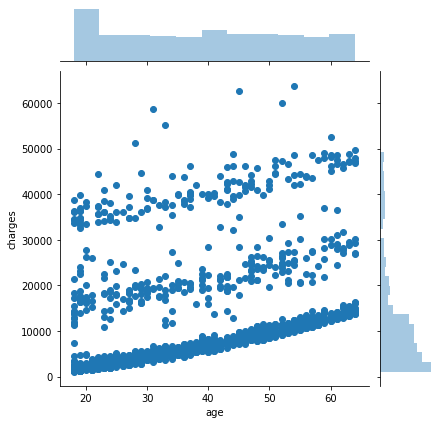

In [124]:
import seaborn as sns
# Correlation betweeen 'charges' and 'age' 
sns.jointplot(x=insurance['age'],y=insurance['charges'])

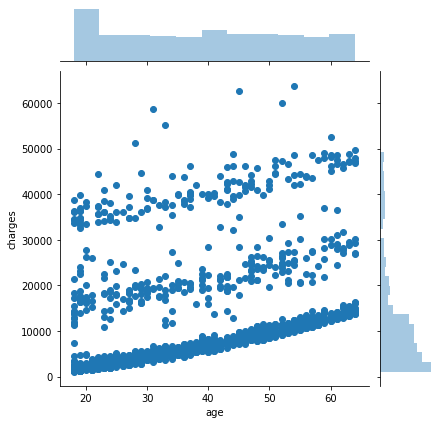

In [125]:
# Correlation betweeen 'charges' and 'smoker' 
sns.jointplot(x=insurance['age'],y=insurance['charges'])

Text(0, 0.5, 'Predicted Y')

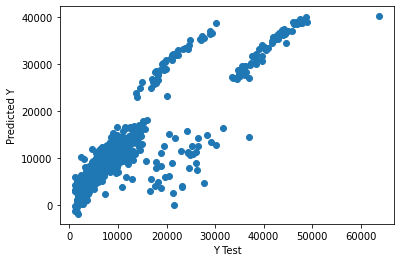

In [127]:
import matplotlib.pyplot as plt
plt.scatter(Y_test,predictions)
plt.xlabel('Y Test')
plt.ylabel('Predicted Y')